In [116]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, UpSampling2D,Activation
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
import torch
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [77]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [87]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Dataset dimensions

In [88]:
print(f'X_train: {x_train.shape}')
print(f'Y_train: {y_train.shape}')
print(f'X_test: {x_test.shape}')
print(f'Y_test: {y_test.shape}')

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


Show sample data

8


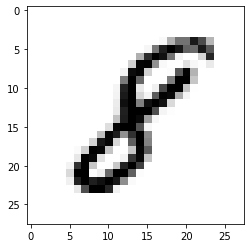

In [89]:
image_index = 7777
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Add noice

In [90]:
noise_factor = 0.25
x_train_noice = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noice = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noice = np.clip(x_train_noice, 0., 1.)
x_test_noice = np.clip(x_test_noice, 0., 1.)

8


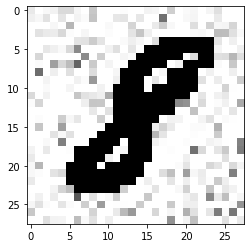

In [91]:
print(y_train[image_index]) 
plt.imshow(x_train_noice[image_index], cmap='Greys')

Reshaping

In [92]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train_noice = x_train_noice.reshape(x_train_noice.shape[0], 28, 28, 1)
x_test_noice = x_test_noice.reshape(x_test_noice.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Normalizing

In [93]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(f'x_train shape: {x_train.shape}')
print(f'Number of images in x_train {x_train.shape[0]}')
print(f'Number of images in x_test {x_test.shape[0]}')
print('======================================')
x_train_noice = x_train_noice.astype('float32')
x_test_noice = x_test_noice.astype('float32')
x_train_noice /= 255
x_test_noice /= 255
print(f'x_train_noice shape: {x_train_noice.shape}')
print(f'Number of images in x_train_noice {x_train_noice.shape[0]}')
print(f'Number of images in x_test_noice {x_test_noice.shape[0]}')

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
x_train_noice shape: (60000, 28, 28, 1)
Number of images in x_train_noice 60000
Number of images in x_test_noice 10000


Autoencider model

In [94]:
autoencoder = Sequential()
#encode
autoencoder.add(Conv2D(28, kernel_size=(7,7), activation=tf.nn.relu, padding='same', input_shape=input_shape))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))
autoencoder.add(Dropout(0.2))
autoencoder.add(Conv2D(14, kernel_size=(7,7), activation=tf.nn.relu, padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2, 2)))
#decode
autoencoder.add(Conv2D(14, kernel_size=(7,7), activation=tf.nn.relu, padding='same'))
autoencoder.add(UpSampling2D())
autoencoder.add(Dropout(0.2))
autoencoder.add(Conv2D(28, kernel_size=(7,7), activation=tf.nn.relu, padding='same'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=(7,7), activation=tf.nn.sigmoid, padding='same'))

Compile autoencoder

In [96]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 28)        1400      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 14)        19222     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 14)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 14)          9618      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 28)       

Denoising

Train on 30000 samples, validate on 30000 samples
Epoch 1/25
30000/30000 [==============================] - 336s 11ms/step - loss: 0.1764 - val_loss: 0.1038
Epoch 2/25
30000/30000 [==============================] - 329s 11ms/step - loss: 0.0969 - val_loss: 0.0984
Epoch 3/25
30000/30000 [==============================] - 339s 11ms/step - loss: 0.0900 - val_loss: 0.0882
Epoch 4/25
30000/30000 [==============================] - 341s 11ms/step - loss: 0.0871 - val_loss: 0.0856
Epoch 5/25
30000/30000 [==============================] - 357s 12ms/step - loss: 0.0854 - val_loss: 0.0850
Epoch 6/25
30000/30000 [==============================] - 328s 11ms/step - loss: 0.0843 - val_loss: 0.0835
Epoch 7/25
30000/30000 [==============================] - 327s 11ms/step - loss: 0.0834 - val_loss: 0.0830
Epoch 8/25
30000/30000 [==============================] - 330s 11ms/step - loss: 0.0828 - val_loss: 0.0822
Epoch 9/25
30000/30000 [==============================] - 347s 12ms/step - loss: 0.0823 - val_

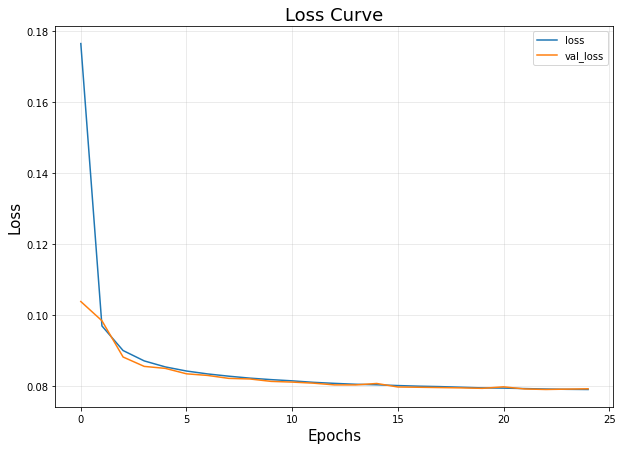

In [98]:
X_noise_train, X_noise_valid, X_train, X_valid = train_test_split(x_train_noice, x_train, test_size=0.5, random_state=42, shuffle=True)

history = autoencoder.fit(X_noise_train, X_train,
                epochs=25,
                shuffle=True,
                validation_data=(X_noise_valid, X_valid)
               )
#save model
model_save_name = 'autoencoder.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
autoencoder.save(path)

#Visualize autoencoder results
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(history.epoch, history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

In [99]:
autoencoder1 = tf.keras.models.load_model(path)
x_train_noice = autoencoder.predict(x_train_noice)
x_test_noice = autoencoder.predict(x_test_noice)

8


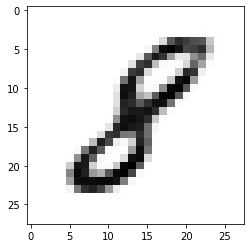

In [100]:
print(y_train[image_index]) 
plt.imshow(x_train_noice[image_index].reshape([28, 28]), cmap='Greys')

Model

In [139]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(7,7), activation=tf.nn.relu, input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3,3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling model

In [140]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
image_classifier_history = model.fit(x=x_train_noice,y=y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.2039 - accuracy: 0.9370
Epoch 2/10
60000/60000 [==============================] - 46s 762us/step - loss: 0.0806 - accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.0617 - accuracy: 0.9811
Epoch 4/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.0530 - accuracy: 0.9826
Epoch 5/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.0458 - accuracy: 0.9858
Epoch 6/10
60000/60000 [==============================] - 45s 745us/step - loss: 0.0384 - accuracy: 0.9876
Epoch 7/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0342 - accuracy: 0.9887
Epoch 8/10
60000/60000 [==============================] - 44s 740us/step - loss: 0.0301 - accuracy: 0.9906
Epoch 9/10
60000/60000 [==============================] - 45s 746us/step - loss: 0.0272 - accuracy: 0.9911
Epoch 10/10
60000/60000 [============

Visualize image classifier results

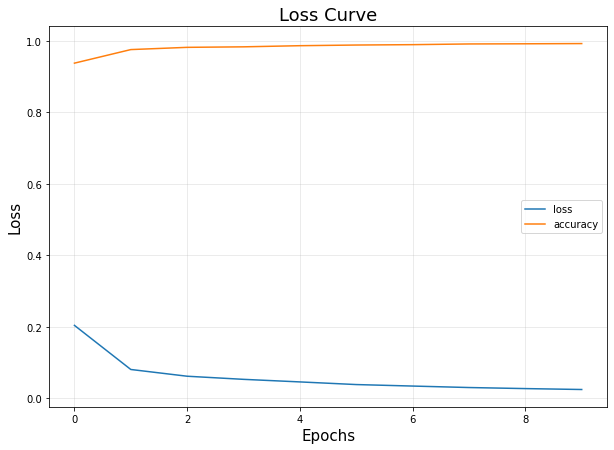

In [141]:
# Defining Figure
f = plt.figure(figsize=(10,7))
f.add_subplot()

#Adding Subplot
plt.plot(image_classifier_history.epoch, image_classifier_history.history['loss'], label = "loss") # Loss curve for training set
plt.plot(image_classifier_history.epoch, image_classifier_history.history['accuracy'], label = "accuracy") # Loss curve for validation set

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

Evaluate model

In [142]:
score = model.evaluate(x_test_noice, y_test)
print(f'Test score: {score[0]}')
print(f'Test accuracy: {score[1]}')

10000/10000 [==============================] - 2s 220us/step
Test score: 0.04593301337655648
Test accuracy: 0.9866999983787537


Visualize results

In [104]:
predicted_classes = model.predict_classes(x_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

Correct results

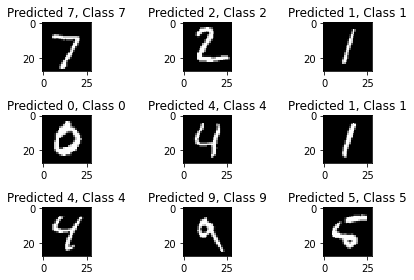

In [105]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

Incorrect results

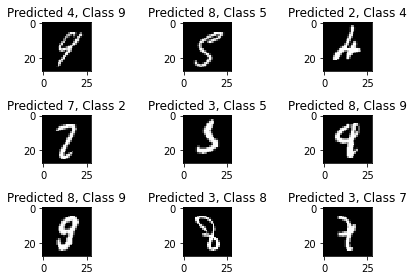

In [106]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()